In [1]:
import os
import sys
curDir = os.path.abspath("")
sys.path.append(os.path.join(curDir, "..", "PreProcessing"))
sys.path.append(os.path.join(curDir, "..", "General"))

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import DataSetBuilder as dataBuilder
import matplotlib as mpl

In [2]:
years = [2013]
dfOrig = dataBuilder.build_data_set(years=years)


20210530--19:15:30--INFO--Reading adjusted data files


In [3]:
columnList = dfOrig.columns.to_list()

In [4]:
class ColumnNames():
    #Partial = "prepayment_type_PartialPrepayment"
    #Full = "prepayment_type_FullPrepayment"
    #PpmFlag = "prepayment_flag_True"
    Upb = "orig_upb"
    Ltv = "ltv"
    Int_rt = "int_rt"
    Cltv = "cltv"
    Prepayment="prepayment_flag"
    Prepaymenttype="prepayment_type"


columns = [
    "id_loan", 
    "ltv",
    "loan_purpose_C",
    "int_rt",
    "cltv",
    ColumnNames.Upb,
    #ColumnNames.Full,
    #ColumnNames.Partial,
    #ColumnNames.PpmFlag,
    ColumnNames.Prepayment,
    ColumnNames.Prepaymenttype
]
dfTakeALook = dfOrig[columns]

In [5]:
dfTakeALook

,id_loan,ltv,loan_purpose_C,int_rt,cltv,orig_upb,prepayment_flag,prepayment_type
0,F113Q1000201,74.0,0,3.600,74.0,149000.0,True,2
1,F113Q1000213,62.0,0,3.375,62.0,99000.0,True,2
2,F113Q1000226,80.0,0,3.250,80.0,134000.0,True,2
3,F113Q1000239,67.0,1,4.000,67.0,240000.0,True,2
4,F113Q1000276,90.0,0,3.500,90.0,86000.0,True,2
...,...,...,...,...,...,...,...,...
49830,F113Q4221053,75.0,1,4.625,79.0,143000.0,False,0
49831,F113Q4221059,80.0,0,4.500,80.0,227000.0,False,0
49832,F113Q4221167,40.0,1,3.375,40.0,41000.0,False,0
49833,F113Q4221174,50.0,1,3.375,50.0,75000.0,False,0


## LTV Description

In the case of a purchase
mortgage loan, the ratio obtained by dividing the original mortgage
loan amount on the note date by the lesser of the mortgaged
property’s appraised value on the note date or its purchase price.
In the case of a refinance mortgage loan, the ratio obtained by dividing
the original mortgage loan amount on the note date and the
mortgaged property’s appraised value on the note date.

In [6]:
dfTakeALook = dfTakeALook.sort_values("ltv")
Full=dfTakeALook["prepayment_type"]==2
Partial=dfTakeALook["prepayment_type"]==1
dfTakeALook["Full"]=Full
dfTakeALook["Partial"]=Partial
dfGrouped = dfTakeALook.groupby("ltv")
dfCumSum = dfGrouped.cumsum()
dfSum = dfGrouped.sum()
dfSum

,loan_purpose_C,int_rt,cltv,orig_upb,prepayment_flag,prepayment_type,Full,Partial
ltv,,,,,,,,
6.0,1,2.990,12.0,120000.0,0,0,0,0
7.0,1,4.250,7.0,80000.0,1,2,1,0
8.0,2,8.250,16.0,183000.0,1,1,0,1
9.0,1,25.500,69.0,971000.0,3,5,2,1
10.0,6,49.000,150.0,1501000.0,7,13,6,1
...,...,...,...,...,...,...,...,...
91.0,0,297.005,7098.0,16999000.0,49,90,41,8
92.0,0,1020.929,23276.0,57303000.0,170,328,158,12
93.0,0,829.006,19251.0,46849000.0,124,239,115,9


Text(0, 0.5, 'Number of observations')

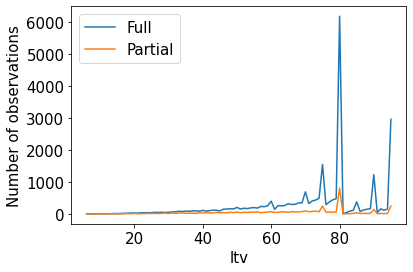

In [8]:
fig, ax = plt.subplots()
mpl.rcParams['font.size']=15
dfSum["Full"].plot(ax=ax)
dfSum["Partial"].plot(ax=ax)
#ax.set_title("Plot of the loan to value \n against the prepayments")
ax.legend(["Full","Partial"])
plt.ylabel("Number of observations")

In [ ]:
#fig, ax = plt.subplots()
#dfSum[ColumnNames.Partial].plot(ax=ax)
#ax.set_title("Plot of the loan to value against the prepayments (partial)")

Loan to value = $\dfrac{loan}{purchase\_price}$ this implies that if for high purchase prices the loan to value is a risk driver, it may so for high original upbs.

Let us compare the upb as a group and plot the aggregated sum of the prepayments. 

In [ ]:
dfUpbGroup = dfTakeALook.groupby(ColumnNames.Upb)
dfSumUpb = dfUpbGroup.sum()

In [ ]:
fig, ax = plt.subplots()
dfSumUpb[ColumnNames.Full].plot(ax=ax)
ax.set_title("Plot of the upb against the summed prepayments (full)")

In [ ]:
fig, ax = plt.subplots()
dfSumUpb[ColumnNames.Partial].plot(ax=ax)
ax.set_title("Plot of the upb against the summed prepayments (partial)")

We see that here, that just lower mortgages seem to prepay more. This is in constrast with the earlier 
observations of the loan to value parameter.

From this we can see that for low loan amounts and a high loan to value score the clients seem to prepay more often.
Let us check this for multiple years; 

In [ ]:
def plot_column(df, year, ax, partial=True, ltv=True):
    titlePrefix = f"[{year}] -- Plot of the upb against the summed prepayments"
    if(partial):
        title = f"{titlePrefix}_partial"
        feature = ColumnNames.Partial
    else:
        title = f"{titlePrefix}_full"
        feature = ColumnNames.Full

    if(ltv):
        title = f"{title}_for_ltv"

    else:
        title = f"{titlePrefix}_full"

    df[feature].plot(ax=ax)
    ax.set_title(title)

In [ ]:
years = range(2013, 2021)
nrows = 8
ncols = 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*nrows, 5*ncols))
i = 0
for year in years:
    dfOrig = dataBuilder.build_data_set(years=[year])
    dfTakeALook = dfOrig[columns]
    
    dfGroupedLtv = dfTakeALook.groupby("ltv")
    dfSumLtv = dfGroupedLtv.sum()

    dfUpbGroup = dfTakeALook.groupby(ColumnNames.Upb)
    dfSumUpb = dfUpbGroup.sum()


    plot_column(dfSumUpb, year, ax=axs[i, 0], partial=True, ltv=False)
    plot_column(dfSumUpb, year, ax=axs[i, 1], partial=False, ltv=False)

    plot_column(dfSumLtv, year, ax=axs[i, 2], partial=True, ltv=True)
    plot_column(dfSumLtv, year, ax=axs[i, 3], partial=False, ltv=True)

    i += 1

fig.tight_layout()

In [ ]:

dfOrig = dataBuilder.build_data_set(years=range(2013, 2021))
dfTakeALook = dfOrig[columns]

In [ ]:
dfPPM = dfTakeALook[dfTakeALook[ColumnNames.Full] == 1]
dfNoPPM = dfTakeALook[dfTakeALook[ColumnNames.Full] == 0]

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].boxplot(dfPPM[ColumnNames.Upb])
axs[0].set_title("Upbs of prepayment data")
axs[1].boxplot(dfNoPPM[ColumnNames.Upb])
axs[1].set_title("Upbs of no prepayment data")

In [ ]:
import DependenceTests as test

In [ ]:
test.ks_test_two_df(dfPPM, dfNoPPM, [ColumnNames.Upb])

In [ ]:
dfPPM = dfTakeALook[dfTakeALook[ColumnNames.Full] == 1]
dfNoPPM = dfTakeALook[dfTakeALook[ColumnNames.Full] == 0]

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].boxplot(dfPPM[ColumnNames.Ltv])
axs[0].set_title("loan to value of prepayment data")
axs[1].boxplot(dfNoPPM[ColumnNames.Upb])
axs[1].set_title("loan to value of no prepayment data")

In [ ]:
test.ks_test_two_df(dfPPM, dfNoPPM, [ColumnNames.Ltv])